 ** Isabel Metzger **
 Last Modified Jun 19th at 07:30

# Here we are importing the dili_mordred file from Zach's notebook

In [208]:
## lstm simple zerostart no feature engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import pandas as pd
import bz2

# importing train and test files
with bz2.open("/root/ToxNeuralNets/result_files/DILI_W_MORDRED.csv.bz2") as f:
    full_df = pd.read_csv(f)

def get_binary_target1_stats(train):
    print('number of labeled 1')
    print(train.label.sum())
    print('number of rows')
    print(train.shape[0])
    print('percentage of target')
    print(round(train.label.sum()/train.shape[0]*100))
    
print(len(list(full_df['Smiles'].unique())), '----- this is the list of unique smiles')

1242 ----- this is the list of unique smiles


In [209]:
full_df.shape

(1527, 1617)

In [210]:
merged_df_with_drops = full_df.head(1241)
merged_df_with_drops.head(1).to_dict('split')

{'index': [0],
 'columns': ['Unnamed: 0',
  'Smiles',
  'Liver',
  'Mol_ID',
  'ABC',
  'ABCGG',
  'nAcid',
  'nBase',
  'SpAbs_A',
  'SpMax_A',
  'SpDiam_A',
  'SpAD_A',
  'SpMAD_A',
  'LogEE_A',
  'VE1_A',
  'VE2_A',
  'VE3_A',
  'VR1_A',
  'VR2_A',
  'VR3_A',
  'nAromAtom',
  'nAromBond',
  'nAtom',
  'nHeavyAtom',
  'nSpiro',
  'nBridgehead',
  'nHetero',
  'nH',
  'nB',
  'nC',
  'nN',
  'nO',
  'nS',
  'nP',
  'nF',
  'nCl',
  'nBr',
  'nI',
  'nX',
  'ATS0dv',
  'ATS1dv',
  'ATS2dv',
  'ATS3dv',
  'ATS4dv',
  'ATS5dv',
  'ATS6dv',
  'ATS7dv',
  'ATS8dv',
  'ATS0d',
  'ATS1d',
  'ATS2d',
  'ATS3d',
  'ATS4d',
  'ATS5d',
  'ATS6d',
  'ATS7d',
  'ATS8d',
  'ATS0s',
  'ATS1s',
  'ATS2s',
  'ATS3s',
  'ATS4s',
  'ATS5s',
  'ATS6s',
  'ATS7s',
  'ATS8s',
  'ATS0Z',
  'ATS1Z',
  'ATS2Z',
  'ATS3Z',
  'ATS4Z',
  'ATS5Z',
  'ATS6Z',
  'ATS7Z',
  'ATS8Z',
  'ATS0m',
  'ATS1m',
  'ATS2m',
  'ATS3m',
  'ATS4m',
  'ATS5m',
  'ATS6m',
  'ATS7m',
  'ATS8m',
  'ATS0v',
  'ATS1v',
  'ATS2v',
  '

In [211]:
full_df[full_df['Smiles'].isna()].head()

,Unnamed: 0,Smiles,Liver,Mol_ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1241,1241,NaN,NaN,NaN,31.749825,24.142500,1,1,50.259236,2.609260,...,10.869311,98.746533,558.183853,8.587444,5797,69,222.0,271.0,15.611111,8.472222
1242,1242,NaN,NaN,NaN,10.894331,9.741441,1,0,17.838606,2.302776,...,9.201401,46.028465,226.039672,8.693834,410,18,68.0,74.0,6.194444,3.527778
1243,1243,NaN,NaN,NaN,20.632065,17.220088,0,0,34.514767,2.504469,...,10.152260,76.306186,403.121818,8.062436,1809,42,138.0,162.0,9.250000,6.138889
1244,1244,NaN,NaN,NaN,19.148902,14.617802,1,1,32.628353,2.447342,...,9.924025,67.325686,337.204179,6.484696,1662,39,124.0,142.0,6.916667,5.694444
1245,1245,NaN,NaN,NaN,16.360915,13.145467,1,0,27.553627,2.464704,...,9.831293,68.929049,282.100442,8.060013,957,29,108.0,125.0,5.916667,4.666667


# Here we read in the enriching file

In [212]:
import os
PP = "~/ToxNeuralNets"
print('reading in the enriching file')
liu_df = pd.read_csv(os.path.join(PP,'enriching_features/models_data_features_toxsci_trainingset_descriptors_AND_Genescore_AND_Modules_AND_Phenotypes_NaN.csv'), na_values="na",delimiter=",", low_memory=False)
print(liu_df.shape)


reading in the enriching file
(1179, 1261)


In [213]:
def Intersection(lst1, lst2): 
    return set(lst1).intersection(lst2) 
      


# Here we are looking at the redundancy of the features from Zach's files

In [214]:
liu_df = liu_df.rename(columns={"SMILES": "Smiles"})
columnsdf1 = list(merged_df_with_drops.columns)
columnsdf2 = list(liu_df.columns)
def Union(lst1, lst2): 
    final_list = sorted(lst1 + lst2) 
    return set(final_list)
print(len(columnsdf1))
print(len(columnsdf2))

1617
1261


In [215]:
col_names_union_unique =list(Union(columnsdf1, columnsdf2))
len(col_names_union_unique)

1877

In [216]:
overlapcols = list(sorted(Intersection(columnsdf1, columnsdf2)))
len(overlapcols)

1001

In [217]:
list(overlapcols)
overlapcols1 =['AATS0Z',
 'AATS0are',
 'AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATS0m',
 'AATS0p',
 'AATS0pe',
 'AATS0s',
 'AATS0se',
 'AATS0v',
 'AATS1Z',
 'AATS1are',
 'AATS1d',
 'AATS1dv',
 'AATS1i',
 'AATS1m',
 'AATS1p',
 'AATS1pe',
 'AATS1s',
 'AATS1se',
 'AATS1v',
 'AATS2Z',
 'AATS2are',
 'AATS2d',
 'AATS2dv',
 'AATS2i',
 'AATS2m',
 'AATS2p',
 'AATS2pe',
 'AATS2s',
 'AATS2se',
 'AATS2v',
 'AATS3Z',
 'AATS3are',
 'AATS3d',
 'AATS3dv',
 'AATS3i',
 'AATS3m',
 'AATS3p',
 'AATS3pe',
 'AATS3s',
 'AATS3se',
 'AATS3v',
 'AATS4Z',
 'AATS4are',
 'AATS4d',
 'AATS4dv',
 'AATS4i',
 'AATS4m',
 'AATS4p',
 'AATS4pe',
 'AATS4s',
 'AATS4se',
 'AATS4v',
 'AATS5Z',
 'AATS5are',
 'AATS5d',
 'AATS5dv',
 'AATS5i',
 'AATS5m',
 'AATS5p',
 'AATS5pe',
 'AATS5s',
 'AATS5se',
 'AATS5v',
 'AATS6Z',
 'AATS6are',
 'AATS6d',
 'AATS6dv',
 'AATS6i',
 'AATS6m',
 'AATS6p',
 'AATS6pe',
 'AATS6s',
 'AATS6se',
 'AATS6v',
 'AATS7Z',
 'AATS7are',
 'AATS7d',
 'AATS7dv',
 'AATS7i',
 'AATS7m',
 'AATS7p',
 'AATS7pe',
 'AATS7s',
 'AATS7se',
 'AATS7v',
 'AATS8Z',
 'AATS8are',
 'AATS8d',
 'AATS8dv',
 'AATS8i',
 'AATS8m',
 'AATS8p',
 'AATS8pe',
 'AATS8s',
 'AATS8se',
 'AATS8v',
 'AATSC0Z',
 'AATSC0are',
 'AATSC0c',
 'AATSC0d',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0m',
 'AATSC0p',
 'AATSC0pe',
 'AATSC0s',
 'AATSC0se',
 'AATSC0v',
 'AATSC1Z',
 'AATSC1are',
 'AATSC1c',
 'AATSC1d',
 'AATSC1dv',
 'AATSC1i',
 'AATSC1m',
 'AATSC1p',
 'AATSC1pe',
 'AATSC1s',
 'AATSC1se',
 'AATSC1v',
 'AATSC2Z',
 'AATSC2are',
 'AATSC2c',
 'AATSC2d',
 'AATSC2dv',
 'AATSC2i',
 'AATSC2m',
 'AATSC2p',
 'AATSC2pe',
 'AATSC2s',
 'AATSC2se',
 'AATSC2v',
 'AATSC3Z',
 'AATSC3are',
 'AATSC3c',
 'AATSC3d',
 'AATSC3dv',
 'AATSC3i',
 'AATSC3m',
 'AATSC3p',
 'AATSC3pe',
 'AATSC3s',
 'AATSC3se',
 'AATSC3v',
 'AATSC4Z',
 'AATSC4are',
 'AATSC4c',
 'AATSC4d',
 'AATSC4dv',
 'AATSC4i',
 'AATSC4m',
 'AATSC4p',
 'AATSC4pe',
 'AATSC4s',
 'AATSC4se',
 'AATSC4v',
 'AATSC5Z',
 'AATSC5are',
 'AATSC5c',
 'AATSC5d',
 'AATSC5dv',
 'AATSC5i',
 'AATSC5m',
 'AATSC5p',
 'AATSC5pe',
 'AATSC5s',
 'AATSC5se',
 'AATSC5v',
 'AATSC6Z',
 'AATSC6are',
 'AATSC6c',
 'AATSC6d',
 'AATSC6dv',
 'AATSC6i',
 'AATSC6m',
 'AATSC6p',
 'AATSC6pe',
 'AATSC6s',
 'AATSC6se',
 'AATSC6v',
 'AATSC7Z',
 'AATSC7are',
 'AATSC7c',
 'AATSC7d',
 'AATSC7dv',
 'AATSC7i',
 'AATSC7m',
 'AATSC7p',
 'AATSC7pe',
 'AATSC7s',
 'AATSC7se',
 'AATSC7v',
 'AATSC8Z',
 'AATSC8are',
 'AATSC8c',
 'AATSC8d',
 'AATSC8dv',
 'AATSC8i',
 'AATSC8m',
 'AATSC8p',
 'AATSC8pe',
 'AATSC8s',
 'AATSC8se',
 'AATSC8v',
 'ABC',
 'ABCGG',
 'ATS0Z',
 'ATS0are',
 'ATS0d',
 'ATS0dv',
 'ATS0i',
 'ATS0m',
 'ATS0p',
 'ATS0pe',
 'ATS0s',
 'ATS0se',
 'ATS0v',
 'ATS1Z',
 'ATS1are',
 'ATS1d',
 'ATS1dv',
 'ATS1i',
 'ATS1m',
 'ATS1p',
 'ATS1pe',
 'ATS1s',
 'ATS1se',
 'ATS1v',
 'ATS2Z',
 'ATS2are',
 'ATS2d',
 'ATS2dv',
 'ATS2i',
 'ATS2m',
 'ATS2p',
 'ATS2pe',
 'ATS2s',
 'ATS2se',
 'ATS2v',
 'ATS3Z',
 'ATS3are',
 'ATS3d',
 'ATS3dv',
 'ATS3i',
 'ATS3m',
 'ATS3p',
 'ATS3pe',
 'ATS3s',
 'ATS3se',
 'ATS3v',
 'ATS4Z',
 'ATS4are',
 'ATS4d',
 'ATS4dv',
 'ATS4i',
 'ATS4m',
 'ATS4p',
 'ATS4pe',
 'ATS4s',
 'ATS4se',
 'ATS4v',
 'ATS5Z',
 'ATS5are',
 'ATS5d',
 'ATS5dv',
 'ATS5i',
 'ATS5m',
 'ATS5p',
 'ATS5pe',
 'ATS5s',
 'ATS5se',
 'ATS5v',
 'ATS6Z',
 'ATS6are',
 'ATS6d',
 'ATS6dv',
 'ATS6i',
 'ATS6m',
 'ATS6p',
 'ATS6pe',
 'ATS6s',
 'ATS6se',
 'ATS6v',
 'ATS7Z',
 'ATS7are',
 'ATS7d',
 'ATS7dv',
 'ATS7i',
 'ATS7m',
 'ATS7p',
 'ATS7pe',
 'ATS7s',
 'ATS7se',
 'ATS7v',
 'ATS8Z',
 'ATS8are',
 'ATS8d',
 'ATS8dv',
 'ATS8i',
 'ATS8m',
 'ATS8p',
 'ATS8pe',
 'ATS8s',
 'ATS8se',
 'ATS8v',
 'ATSC0Z',
 'ATSC0are',
 'ATSC0c',
 'ATSC0d',
 'ATSC0dv',
 'ATSC0i',
 'ATSC0m',
 'ATSC0p',
 'ATSC0pe',
 'ATSC0s',
 'ATSC0se',
 'ATSC0v',
 'ATSC1Z',
 'ATSC1are',
 'ATSC1c',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1m',
 'ATSC1p',
 'ATSC1pe',
 'ATSC1s',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2are',
 'ATSC2c',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2m',
 'ATSC2p',
 'ATSC2pe',
 'ATSC2s',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3are',
 'ATSC3c',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3m',
 'ATSC3p',
 'ATSC3pe',
 'ATSC3s',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4are',
 'ATSC4c',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4m',
 'ATSC4p',
 'ATSC4pe',
 'ATSC4s',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5are',
 'ATSC5c',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5m',
 'ATSC5p',
 'ATSC5pe',
 'ATSC5s',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6are',
 'ATSC6c',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6m',
 'ATSC6p',
 'ATSC6pe',
 'ATSC6s',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7are',
 'ATSC7c',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7m',
 'ATSC7p',
 'ATSC7pe',
 'ATSC7s',
 'ATSC7se',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8are',
 'ATSC8c',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8m',
 'ATSC8p',
 'ATSC8pe',
 'ATSC8s',
 'ATSC8se',
 'ATSC8v',
 'AXp-0d',
 'AXp-0dv',
 'AXp-1d',
 'AXp-1dv',
 'AXp-2d',
 'AXp-2dv',
 'AXp-3d',
 'AXp-3dv',
 'AXp-4d',
 'AXp-4dv',
 'AXp-5d',
 'AXp-5dv',
 'AXp-6d',
 'AXp-6dv',
 'AXp-7d',
 'AXp-7dv',
 'BCUTZ-1h',
 'BCUTZ-1l',
 'BCUTare-1h',
 'BCUTare-1l',
 'BCUTc-1h',
 'BCUTc-1l',
 'BCUTd-1h',
 'BCUTd-1l',
 'BCUTdv-1h',
 'BCUTdv-1l',
 'BCUTi-1h',
 'BCUTi-1l',
 'BCUTm-1h',
 'BCUTm-1l',
 'BCUTp-1h',
 'BCUTp-1l',
 'BCUTpe-1h',
 'BCUTpe-1l',
 'BCUTs-1h',
 'BCUTs-1l',
 'BCUTse-1h',
 'BCUTse-1l',
 'BCUTv-1h',
 'BCUTv-1l',
 'BalabanJ',
 'BertzCT',
 'C1SP1',
 'C1SP2',
 'C1SP3',
 'C2SP1',
 'C2SP2',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'C4SP3',
 'DetourIndex',
 'FCSP3',
 'GATS1Z',
 'GATS1are',
 'GATS1c',
 'GATS1d',
 'GATS1dv',
 'GATS1i',
 'GATS1m',
 'GATS1p',
 'GATS1pe',
 'GATS1s',
 'GATS1se',
 'GATS1v',
 'GATS2Z',
 'GATS2are',
 'GATS2c',
 'GATS2d',
 'GATS2dv',
 'GATS2i',
 'GATS2m',
 'GATS2p',
 'GATS2pe',
 'GATS2s',
 'GATS2se',
 'GATS2v',
 'GATS3Z',
 'GATS3are',
 'GATS3c',
 'GATS3d',
 'GATS3dv',
 'GATS3i',
 'GATS3m',
 'GATS3p',
 'GATS3pe',
 'GATS3s',
 'GATS3se',
 'GATS3v',
 'GATS4Z',
 'GATS4are',
 'GATS4c',
 'GATS4d',
 'GATS4dv',
 'GATS4i',
 'GATS4m',
 'GATS4p',
 'GATS4pe',
 'GATS4s',
 'GATS4se',
 'GATS4v',
 'GATS5Z',
 'GATS5are',
 'GATS5c',
 'GATS5d',
 'GATS5dv',
 'GATS5i',
 'GATS5m',
 'GATS5p',
 'GATS5pe',
 'GATS5s',
 'GATS5se',
 'GATS5v',
 'GATS6Z',
 'GATS6are',
 'GATS6c',
 'GATS6d',
 'GATS6dv',
 'GATS6i',
 'GATS6m',
 'GATS6p',
 'GATS6pe',
 'GATS6s',
 'GATS6se',
 'GATS6v',
 'GATS7Z',
 'GATS7are',
 'GATS7c',
 'GATS7d',
 'GATS7dv',
 'GATS7i',
 'GATS7m',
 'GATS7p',
 'GATS7pe',
 'GATS7s',
 'GATS7se',
 'GATS7v',
 'GATS8Z',
 'GATS8are',
 'GATS8c',
 'GATS8d',
 'GATS8dv',
 'GATS8i',
 'GATS8m',
 'GATS8p',
 'GATS8pe',
 'GATS8s',
 'GATS8se',
 'GATS8v',
 'HybRatio',
 'LogEE_A',
 'LogEE_D',
 'LogEE_Dt',
 'LogEE_DzZ',
 'LogEE_Dzare',
 'LogEE_Dzi',
 'LogEE_Dzm',
 'LogEE_Dzp',
 'LogEE_Dzpe',
 'LogEE_Dzse',
 'LogEE_Dzv',
 'MATS1Z',
 'MATS1are',
 'MATS1c',
 'MATS1d',
 'MATS1dv',
 'MATS1i',
 'MATS1m',
 'MATS1p',
 'MATS1pe',
 'MATS1s',
 'MATS1se',
 'MATS1v',
 'MATS2Z',
 'MATS2are',
 'MATS2c',
 'MATS2d',
 'MATS2dv',
 'MATS2i',
 'MATS2m',
 'MATS2p',
 'MATS2pe',
 'MATS2s',
 'MATS2se',
 'MATS2v',
 'MATS3Z',
 'MATS3are',
 'MATS3c',
 'MATS3d',
 'MATS3dv',
 'MATS3i',
 'MATS3m',
 'MATS3p',
 'MATS3pe',
 'MATS3s',
 'MATS3se',
 'MATS3v',
 'MATS4Z',
 'MATS4are',
 'MATS4c',
 'MATS4d',
 'MATS4dv',
 'MATS4i',
 'MATS4m',
 'MATS4p',
 'MATS4pe',
 'MATS4s',
 'MATS4se',
 'MATS4v',
 'MATS5Z',
 'MATS5are',
 'MATS5c',
 'MATS5d',
 'MATS5dv',
 'MATS5i',
 'MATS5m',
 'MATS5p',
 'MATS5pe',
 'MATS5s',
 'MATS5se',
 'MATS5v',
 'MATS6Z',
 'MATS6are',
 'MATS6c',
 'MATS6d',
 'MATS6dv',
 'MATS6i',
 'MATS6m',
 'MATS6p',
 'MATS6pe',
 'MATS6s',
 'MATS6se',
 'MATS6v',
 'MATS7Z',
 'MATS7are',
 'MATS7c',
 'MATS7d',
 'MATS7dv',
 'MATS7i',
 'MATS7m',
 'MATS7p',
 'MATS7pe',
 'MATS7s',
 'MATS7se',
 'MATS7v',
 'MATS8Z',
 'MATS8are',
 'MATS8c',
 'MATS8d',
 'MATS8dv',
 'MATS8i',
 'MATS8m',
 'MATS8p',
 'MATS8pe',
 'MATS8s',
 'MATS8se',
 'MATS8v',
 'MZ',
 'Mare',
 'Mi',
 'Mm',
 'Mp',
 'Mpe',
 'Mse',
 'Mv',
 'NaaCH',
 'NaaN',
 'NaaNH',
 'NaaO',
 'NaaS',
 'NaaSe',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NdCH2',
 'NdNH',
 'NdO',
 'NdS',
 'NdSe',
 'NddC',
 'NddsN',
 'NddssS',
 'NddssSe',
 'NdsCH',
 'NdsN',
 'NdssC',
 'NdssS',
 'NdssSe',
 'NdsssP',
 'NsAsH2',
 'NsBr',
 'NsCH3',
 'NsCl',
 'NsF',
 'NsGeH3',
 'NsI',
 'NsLi',
 'NsNH2',
 'NsNH3',
 'NsOH',
 'NsPH2',
 'NsPbH3',
 'NsSH',
 'NsSeH',
 'NsSiH3',
 'NsSnH3',
 'NssAsH',
 'NssBH',
 'NssBe',
 'NssCH2',
 'NssGeH2',
 'NssNH',
 'NssNH2',
 'NssO',
 'NssPH',
 'NssPbH2',
 'NssS',
 'NssSe',
 'NssSiH2',
 'NssSnH2',
 'NsssAs',
 'NsssB',
 'NsssCH',
 'NsssGeH',
 'NsssN',
 'NsssNH',
 'NsssP',
 'NsssPbH',
 'NsssSiH',
 'NsssSnH',
 'NsssdAs',
 'NssssB',
 'NssssBe',
 'NssssC',
 'NssssGe',
 'NssssN',
 'NssssPb',
 'NssssSi',
 'NssssSn',
 'NsssssAs',
 'NsssssP',
 'NtCH',
 'NtN',
 'NtsC',
 'RNCG',
 'RPCG',
 'SM1_Dt',
 'SM1_DzZ',
 'SM1_Dzare',
 'SM1_Dzi',
 'SM1_Dzm',
 'SM1_Dzp',
 'SM1_Dzpe',
 'SM1_Dzse',
 'SM1_Dzv',
 'SZ',
 'SaaCH',
 'SaaN',
 'SaaNH',
 'SaaaC',
 'SaasC',
 'Sare',
 'SdCH2',
 'SdNH',
 'SddC',
 'SdsCH',
 'SdsN',
 'SdssC',
 'Si',
 'Sm',
 'Smiles',
 'Sp',
 'SpAD_A',
 'SpAD_D',
 'SpAD_Dt',
 'SpAD_DzZ',
 'SpAD_Dzare',
 'SpAD_Dzi',
 'SpAD_Dzm',
 'SpAD_Dzp',
 'SpAD_Dzpe',
 'SpAD_Dzse',
 'SpAD_Dzv',
 'SpAbs_A',
 'SpAbs_D',
 'SpAbs_Dt',
 'SpAbs_DzZ',
 'SpAbs_Dzare',
 'SpAbs_Dzi',
 'SpAbs_Dzm',
 'SpAbs_Dzp',
 'SpAbs_Dzpe',
 'SpAbs_Dzse',
 'SpAbs_Dzv',
 'SpDiam_A',
 'SpDiam_D',
 'SpDiam_Dt',
 'SpDiam_DzZ',
 'SpDiam_Dzare',
 'SpDiam_Dzi',
 'SpDiam_Dzm',
 'SpDiam_Dzp',
 'SpDiam_Dzpe',
 'SpDiam_Dzse',
 'SpDiam_Dzv',
 'SpMAD_A',
 'SpMAD_D',
 'SpMAD_Dt',
 'SpMAD_DzZ',
 'SpMAD_Dzare',
 'SpMAD_Dzi',
 'SpMAD_Dzm',
 'SpMAD_Dzp',
 'SpMAD_Dzpe',
 'SpMAD_Dzse',
 'SpMAD_Dzv',
 'SpMax_A',
 'SpMax_D',
 'SpMax_Dt',
 'SpMax_DzZ',
 'SpMax_Dzare',
 'SpMax_Dzi',
 'SpMax_Dzm',
 'SpMax_Dzp',
 'SpMax_Dzpe',
 'SpMax_Dzse',
 'SpMax_Dzv',
 'Spe',
 'SsCH3',
 'SsLi',
 'SsNH2',
 'SsNH3',
 'Sse',
 'SssBH',
 'SssBe',
 'SssCH2',
 'SssNH',
 'SssNH2',
 'SsssB',
 'SsssCH',
 'SsssN',
 'SsssNH',
 'SssssB',
 'SssssBe',
 'SssssC',
 'StCH',
 'StN',
 'StsC',
 'Sv',
 'VE1_A',
 'VE1_D',
 'VE1_Dt',
 'VE1_DzZ',
 'VE1_Dzare',
 'VE1_Dzi',
 'VE1_Dzm',
 'VE1_Dzp',
 'VE1_Dzpe',
 'VE1_Dzse',
 'VE1_Dzv',
 'VE2_A',
 'VE2_D',
 'VE2_Dt',
 'VE2_DzZ',
 'VE2_Dzare',
 'VE2_Dzi',
 'VE2_Dzm',
 'VE2_Dzp',
 'VE2_Dzpe',
 'VE2_Dzse',
 'VE2_Dzv',
 'VE3_A',
 'VE3_D',
 'VE3_Dt',
 'VE3_DzZ',
 'VE3_Dzare',
 'VE3_Dzi',
 'VE3_Dzm',
 'VE3_Dzp',
 'VE3_Dzpe',
 'VE3_Dzse',
 'VE3_Dzv',
 'VR1_A',
 'VR1_D',
 'VR1_Dt',
 'VR1_DzZ',
 'VR1_Dzare',
 'VR1_Dzi',
 'VR1_Dzm',
 'VR1_Dzp',
 'VR1_Dzpe',
 'VR1_Dzse',
 'VR1_Dzv',
 'VR2_A',
 'VR2_D',
 'VR2_Dt',
 'VR2_DzZ',
 'VR2_Dzare',
 'VR2_Dzi',
 'VR2_Dzm',
 'VR2_Dzp',
 'VR2_Dzpe',
 'VR2_Dzse',
 'VR2_Dzv',
 'VR3_A',
 'VR3_D',
 'VR3_Dt',
 'VR3_DzZ',
 'VR3_Dzare',
 'VR3_Dzi',
 'VR3_Dzm',
 'VR3_Dzp',
 'VR3_Dzpe',
 'VR3_Dzse',
 'VR3_Dzv',
 'Xc-3d',
 'Xc-3dv',
 'Xc-4d',
 'Xc-4dv',
 'Xc-5d',
 'Xc-5dv',
 'Xc-6d',
 'Xc-6dv',
 'Xch-3d',
 'Xch-3dv',
 'Xch-4d',
 'Xch-4dv',
 'Xch-5d',
 'Xch-5dv',
 'Xch-6d',
 'Xch-6dv',
 'Xch-7d',
 'Xch-7dv',
 'Xp-0d',
 'Xp-0dv',
 'Xp-1d',
 'Xp-1dv',
 'Xp-2d',
 'Xp-2dv',
 'Xp-3d',
 'Xp-3dv',
 'Xp-4d',
 'Xp-4dv',
 'Xp-5d',
 'Xp-5dv',
 'Xp-6d',
 'Xp-6dv',
 'Xp-7d',
 'Xp-7dv',
 'Xpc-4d',
 'Xpc-4dv',
 'Xpc-5d',
 'Xpc-5dv',
 'Xpc-6d',
 'Xpc-6dv',
 'nAcid',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nB',
 'nBase',
 'nBonds',
 'nBondsA',
 'nBondsD',
 'nBondsKD',
 'nBondsKS',
 'nBondsM',
 'nBondsO',
 'nBondsS',
 'nBondsT',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nH',
 'nHeavyAtom',
 'nHetero',
 'nI',
 'nN',
 'nO',
 'nP',
 'nS',
 'nSpiro', 'nX']
len(overlapcols1)


1001

# The columns above are those that are redundant in the dataset, think ABC_x, ABC_y

In [218]:
first_list = list(merged_df_with_drops['Smiles'].unique())[0:10]
liu_list = list(liu_df['Smiles'].unique())
liu_df[liu_df['Smiles'].isin(first_list)]

,Smiles,Sum of Reciprical of rank,genescore_times_floorlog10ofpvalue,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,"Hypertrophy >= 1.33, 2) no other finding","Increased glycogen, 2) any other finding","Increased mitosis, 1) no other findings","Necrosis, 1) no other findings","Single cell necrosis, 2) allowing hypertrophy","Tbili >= 100%, 2) with hyperplasia at any grade, any other path at any grade","Trigs < -60%, 1) no path findings and FC >-15%","Trigs > 80%, 1) no path findings","Vacuolation, 2) allowing hypertrophy at any grade",label
129,Clc1ccc(C(=O)n2c(c(c3c2ccc(OC)c3)CC(=O)OCC(=O)...,1.362178,17.754620,22.293568,18.187943,1.0,0.0,36.578780,2.545171,4.912104,...,2.947130,NaN,NaN,1.506682,NaN,2.045471,NaN,NaN,0.519317,1
132,Clc1ccc(C[C@@H](NC(=O)[C@H](NC(=O)C)Cc2cc3c(cc...,2.591504,42.693249,76.862682,58.368692,0.0,1.0,125.113479,2.412042,4.800123,...,5.378359,0.262984,1.064018,0.428908,NaN,0.930087,0.083993,NaN,0.003934,1
434,O(C[C@@H](O)CNC(C)C)c1c(cc(NC(=O)CCC)cc1)C(=O)C,0.099660,0.760064,17.546021,14.908963,0.0,1.0,28.601421,2.354497,4.708995,...,0.190239,NaN,NaN,0.131764,NaN,0.155351,0.018390,NaN,NaN,1
503,O([C@H]1[C@H](O)[C@@H](O)[C@H](O[C@@H]1CO)O[C@...,4.044450,121.783605,33.790265,26.700638,0.0,1.0,55.609056,2.483834,4.967669,...,0.173598,0.000899,NaN,6.985869,NaN,7.018156,0.006916,NaN,0.016143,1
910,Oc1cc2c(cc1)cccc2,0.125454,1.675356,8.554231,7.309128,0.0,0.0,14.426921,2.333244,4.666488,...,0.072155,NaN,NaN,0.019041,NaN,0.069446,NaN,NaN,NaN,1
945,S(=O)(=O)(N)c1sc(NC(=O)C)nn1,0.011161,0.173860,9.826314,9.493560,0.0,0.0,14.562939,2.359004,4.584174,...,0.013530,NaN,NaN,0.011367,NaN,0.000676,NaN,NaN,NaN,0
1105,S=C=Nc1c2c(ccc1)cccc2,0.026605,0.107716,9.818615,8.499990,0.0,0.0,17.130940,2.368752,4.737504,...,0.064164,NaN,0.010211,0.010211,NaN,0.001686,NaN,NaN,NaN,1
1127,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,0.734969,6.781955,9.618017,9.150803,0.0,0.0,15.158804,2.337747,4.675495,...,1.470138,0.083020,0.254973,0.010825,0.000476,0.311952,0.197157,NaN,0.050395,1
1128,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,0.064130,0.651977,11.877237,11.411786,0.0,0.0,18.380381,2.411142,4.822284,...,0.010342,0.008537,0.128815,NaN,NaN,0.056213,0.137352,NaN,NaN,1


In [219]:
smileslist2 = list(liu_df[liu_df['Smiles'].isin(first_list)]['Smiles'].unique())
full_df[full_df['Smiles'].isin(smileslist2)]


,Unnamed: 0,Smiles,Liver,Mol_ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,S=C=Nc1c2c(ccc1)cccc2,Hepatotoxicity,Mol0,9.818615,8.499990,0,0,17.130940,2.368752,...,9.382527,44.188427,185.029920,9.251496,236,18,64.0,74.0,3.583333,3.055556
1,1,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,Hepatotoxicity,Mol1,11.877237,11.411786,0,0,18.380381,2.411142,...,9.637763,48.280750,227.017835,10.810373,408,25,78.0,90.0,8.277778,3.555556
2,2,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,Hepatotoxicity,Mol2,9.618017,9.150803,0,0,15.158804,2.337747,...,9.300821,43.952649,184.012021,10.824237,240,18,62.0,70.0,6.305556,2.916667
4,4,Oc1cc2c(cc1)cccc2,Hepatotoxicity,Mol4,8.554231,7.309128,0,0,14.426921,2.333244,...,9.225721,41.498380,144.057515,7.581974,144,14,56.0,64.0,3.083333,2.444444
5,5,Clc1ccc(C[C@@H](NC(=O)[C@H](NC(=O)C)Cc2cc3c(cc...,Hepatotoxicity,Mol5,76.862682,58.368692,0,1,125.113479,2.412042,...,11.307904,155.806250,1414.684071,7.217776,70741,156,502.0,572.0,38.527778,22.500000
6,6,O([C@H]1[C@H](O)[C@@H](O)[C@H](O[C@@H]1CO)O[C@...,Hepatotoxicity,Mol6,33.790265,26.700638,0,1,55.609056,2.483834,...,10.886783,82.039467,645.248014,7.416644,7413,86,234.0,285.0,18.722222,9.777778
7,7,O(C[C@@H](O)CNC(C)C)c1c(cc(NC(=O)CCC)cc1)C(=O)C,Hepatotoxicity,Mol7,17.546021,14.908963,0,1,28.601421,2.354497,...,9.663897,57.384332,336.204907,6.465479,1568,31,110.0,120.0,10.277778,5.555556
8,8,Clc1ccc(C(=O)n2c(c(c3c2ccc(OC)c3)CC(=O)OCC(=O)...,Hepatotoxicity,Mol8,22.293568,18.187943,1,0,36.578780,2.545171,...,10.280656,79.078849,415.082265,8.831538,2238,47,150.0,177.0,10.972222,6.444444
9,9,S(=O)(=O)(N)c1sc(NC(=O)C)nn1,NonHepatotoxicity,Mol9,9.826314,9.493560,0,0,14.562939,2.359004,...,9.256938,57.567931,221.988132,11.683586,257,14,64.0,70.0,6.395833,2.750000


In [220]:
merged_liu_df = pd.merge(merged_df_with_drops, liu_df, on=overlapcols1, how='outer')
merged_liu_df.shape

(2420, 1877)

In [221]:
# merge_on_multiple = pd.concat([merged_df_with_drops, liu_df], axis=1,)
# merge_on_multiple.shape

In [15]:
# merge_on_multiple.shape

In [222]:
innermerge = pd.merge(merged_df_with_drops, liu_df, on = 'Smiles', how='inner')
innermerge[['ABC_x', 'ABC_y']].head(7)

,ABC_x,ABC_y
0,9.818615,9.818615
1,11.877237,11.877237
2,9.618017,9.618017
3,8.554231,8.554231
4,76.862682,76.862682
5,33.790265,33.790265
6,17.546021,17.546021


In [223]:
df1 = merged_df_with_drops.drop(columns=['Unnamed: 0'])
df1.head()

,Smiles,Liver,Mol_ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,S=C=Nc1c2c(ccc1)cccc2,Hepatotoxicity,Mol0,9.818615,8.499990,0,0,17.130940,2.368752,4.737504,...,9.382527,44.188427,185.029920,9.251496,236,18,64.0,74.0,3.583333,3.055556
1,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,Hepatotoxicity,Mol1,11.877237,11.411786,0,0,18.380381,2.411142,4.822284,...,9.637763,48.280750,227.017835,10.810373,408,25,78.0,90.0,8.277778,3.555556
2,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,Hepatotoxicity,Mol2,9.618017,9.150803,0,0,15.158804,2.337747,4.675495,...,9.300821,43.952649,184.012021,10.824237,240,18,62.0,70.0,6.305556,2.916667
3,O(CCO)CC,Hepatotoxicity,Mol3,3.535534,3.869735,0,0,6.987918,1.801938,3.603875,...,6.608001,28.105124,90.068080,5.629255,35,3,18.0,16.0,3.000000,1.750000
4,Oc1cc2c(cc1)cccc2,Hepatotoxicity,Mol4,8.554231,7.309128,0,0,14.426921,2.333244,4.666488,...,9.225721,41.498380,144.057515,7.581974,144,14,56.0,64.0,3.083333,2.444444


In [224]:
#merged_liu_df_deprec = pd.concat([merged_df_with_drops, liu_df], axis=1)
# print(df1.isna().sum().sort_values())
# dropping ALL NULLS
df1 = df1.dropna(axis=1, how='all')
print(df1.shape)
nulldf1 = pd.DataFrame(df1.isna().sum().sort_values())
nulldf1[nulldf1[0] > .99*1241]

(1241, 1542)


,0
MAXdssS,1229
MINdssS,1229
MAXtCH,1230
MINtCH,1230
MAXsBr,1230
MINsBr,1230
MINdS,1231
MAXdS,1231
MAXsSH,1236
MINsSH,1236


In [225]:
overlapcols1.remove('Smiles')
overlapcols1

['AATS0Z',
 'AATS0are',
 'AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATS0m',
 'AATS0p',
 'AATS0pe',
 'AATS0s',
 'AATS0se',
 'AATS0v',
 'AATS1Z',
 'AATS1are',
 'AATS1d',
 'AATS1dv',
 'AATS1i',
 'AATS1m',
 'AATS1p',
 'AATS1pe',
 'AATS1s',
 'AATS1se',
 'AATS1v',
 'AATS2Z',
 'AATS2are',
 'AATS2d',
 'AATS2dv',
 'AATS2i',
 'AATS2m',
 'AATS2p',
 'AATS2pe',
 'AATS2s',
 'AATS2se',
 'AATS2v',
 'AATS3Z',
 'AATS3are',
 'AATS3d',
 'AATS3dv',
 'AATS3i',
 'AATS3m',
 'AATS3p',
 'AATS3pe',
 'AATS3s',
 'AATS3se',
 'AATS3v',
 'AATS4Z',
 'AATS4are',
 'AATS4d',
 'AATS4dv',
 'AATS4i',
 'AATS4m',
 'AATS4p',
 'AATS4pe',
 'AATS4s',
 'AATS4se',
 'AATS4v',
 'AATS5Z',
 'AATS5are',
 'AATS5d',
 'AATS5dv',
 'AATS5i',
 'AATS5m',
 'AATS5p',
 'AATS5pe',
 'AATS5s',
 'AATS5se',
 'AATS5v',
 'AATS6Z',
 'AATS6are',
 'AATS6d',
 'AATS6dv',
 'AATS6i',
 'AATS6m',
 'AATS6p',
 'AATS6pe',
 'AATS6s',
 'AATS6se',
 'AATS6v',
 'AATS7Z',
 'AATS7are',
 'AATS7d',
 'AATS7dv',
 'AATS7i',
 'AATS7m',
 'AATS7p',
 'AATS7pe',
 'AATS7s',
 'AATS7se',
 'A

In [226]:
liu_df = liu_df.drop(columns=overlapcols1)
print(liu_df.shape)

(1179, 261)


In [227]:
df2 = pd.DataFrame(liu_df.isna().sum().sort_values())
# dropping ALL NULLS

df2

,0
Smiles,0
genescore_times_floorlog10ofpvalue,0
label,0
Sum of Reciprical of rank,0
"Tbili >= 100%, 2) with hyperplasia at any grade, any other path at any grade",268
"Hypertrophy >= 1.33, 2) no other finding",281
"Bile duct hyperplasia, 3) any other findings; any grade for necrosis, single cell necrosis, fibrosis, hypertrophy or increased mitosis",298
"Hematopoeisis, 2) any other finding",354
Fibrosis at any grade with any other pathology at any grade,454
"Necrosis, 1) no other findings",475


In [228]:
merged_liu_df = pd.merge(df1, liu_df, on='Smiles')
merged_liu_df.head()

,Smiles,Liver,Mol_ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,"Hypertrophy >= 1.33, 2) no other finding","Increased glycogen, 2) any other finding","Increased mitosis, 1) no other findings","Necrosis, 1) no other findings","Single cell necrosis, 2) allowing hypertrophy","Tbili >= 100%, 2) with hyperplasia at any grade, any other path at any grade","Trigs < -60%, 1) no path findings and FC >-15%","Trigs > 80%, 1) no path findings","Vacuolation, 2) allowing hypertrophy at any grade",label
0,S=C=Nc1c2c(ccc1)cccc2,Hepatotoxicity,Mol0,9.818615,8.499990,0,0,17.130940,2.368752,4.737504,...,0.064164,NaN,0.010211,0.010211,NaN,0.001686,NaN,NaN,NaN,1
1,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,Hepatotoxicity,Mol1,11.877237,11.411786,0,0,18.380381,2.411142,4.822284,...,0.010342,0.008537,0.128815,NaN,NaN,0.056213,0.137352,NaN,NaN,1
2,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,Hepatotoxicity,Mol2,9.618017,9.150803,0,0,15.158804,2.337747,4.675495,...,1.470138,0.083020,0.254973,0.010825,0.000476,0.311952,0.197157,NaN,0.050395,1
3,Oc1cc2c(cc1)cccc2,Hepatotoxicity,Mol4,8.554231,7.309128,0,0,14.426921,2.333244,4.666488,...,0.072155,NaN,NaN,0.019041,NaN,0.069446,NaN,NaN,NaN,1
4,Clc1ccc(C[C@@H](NC(=O)[C@H](NC(=O)C)Cc2cc3c(cc...,Hepatotoxicity,Mol5,76.862682,58.368692,0,1,125.113479,2.412042,4.800123,...,5.378359,0.262984,1.064018,0.428908,NaN,0.930087,0.083993,NaN,0.003934,1


In [229]:
# merged_liu_df =  merged_df_with_drops.join(liu_df)
# merged_liu_df
#pd.concat([merged_df_with_drops, liu_df], ignore_index=True, b).drop_duplicates()

In [230]:
# merged_liu_df.drop_duplicates()

In [231]:
FINAL_FULL_DF = merged_liu_df.fillna(0)#merged_liu_df.fillna(0)
FINAL_FULL_DF.describe()

## INCORPORATE CODY'S CODEEe

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,"Hypertrophy >= 1.33, 2) no other finding","Increased glycogen, 2) any other finding","Increased mitosis, 1) no other findings","Necrosis, 1) no other findings","Single cell necrosis, 2) allowing hypertrophy","Tbili >= 100%, 2) with hyperplasia at any grade, any other path at any grade","Trigs < -60%, 1) no path findings and FC >-15%","Trigs > 80%, 1) no path findings","Vacuolation, 2) allowing hypertrophy at any grade",label
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,...,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,21.722439,17.562079,0.396435,0.731749,35.420072,2.456773,4.869460,35.420072,1.254836,4.116869,...,0.959900,0.066778,0.074643,0.201631,0.006204,0.324248,0.068306,0.000762,0.150546,0.550934
std,17.683959,12.786799,0.937225,1.287556,28.714815,0.136663,0.258065,28.714815,0.058657,0.485863,...,2.865912,0.176557,0.267153,0.695039,0.029608,0.832103,0.167281,0.004980,0.355438,0.497610
min,4.461420,4.736714,0.000000,0.000000,7.384646,1.918986,3.837972,7.384646,0.923081,2.752227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.311544,12.461206,0.000000,0.000000,23.377559,2.377166,4.724356,23.377559,1.225275,3.848884,...,0.000463,0.000000,0.000000,0.000000,0.000000,0.001427,0.000000,0.000000,0.000000,0.000000
50%,18.535981,15.097093,0.000000,0.000000,30.405667,2.459334,4.859646,30.405667,1.258685,4.108444,...,0.056168,0.000000,0.000000,0.007667,0.000000,0.042012,0.001205,0.000000,0.000000,1.000000
75%,23.434202,18.903305,0.750000,1.000000,38.528487,2.536156,5.035129,38.528487,1.292439,4.335895,...,0.392531,0.016924,0.018226,0.111658,0.000000,0.262313,0.038833,0.000000,0.051356,1.000000
max,241.579838,174.358527,10.000000,14.000000,396.516849,3.187649,6.093353,396.516849,1.403982,6.652918,...,22.036753,1.519854,2.214875,6.985869,0.333843,7.669508,2.084296,0.033264,2.877466,1.000000


In [234]:
Ygt = FINAL_FULL_DF[['Smiles','Mol_ID', 'label', 'Liver']]
Ygt.to_csv('FINAL_Y.csv', index= False)
Ygt.head(10)

,Smiles,Mol_ID,label,Liver
0,S=C=Nc1c2c(ccc1)cccc2,Mol0,1,Hepatotoxicity
1,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,Mol1,1,Hepatotoxicity
2,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,Mol2,1,Hepatotoxicity
3,Oc1cc2c(cc1)cccc2,Mol4,1,Hepatotoxicity
4,Clc1ccc(C[C@@H](NC(=O)[C@H](NC(=O)C)Cc2cc3c(cc...,Mol5,1,Hepatotoxicity
5,O([C@H]1[C@H](O)[C@@H](O)[C@H](O[C@@H]1CO)O[C@...,Mol6,1,Hepatotoxicity
6,O(C[C@@H](O)CNC(C)C)c1c(cc(NC(=O)CCC)cc1)C(=O)C,Mol7,1,Hepatotoxicity
7,Clc1ccc(C(=O)n2c(c(c3c2ccc(OC)c3)CC(=O)OCC(=O)...,Mol8,1,Hepatotoxicity
8,S(=O)(=O)(N)c1sc(NC(=O)C)nn1,Mol9,0,NonHepatotoxicity
9,S1c2c(N(CCCN3CCN(CC3)CCO)c3c1cccc3)cc(cc2)C(=O)C,Mol11,1,Hepatotoxicity


In [235]:
FINAL_FULL_DF['Smiles'][0:4].values

array(['S=C=Nc1c2c(ccc1)cccc2',
       'c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-])C',
       'c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O', 'Oc1cc2c(cc1)cccc2'],
      dtype=object)

In [236]:
FINAL_FULL_DF.shape #.head(2).to_dict()

(1178, 1802)

In [29]:
# "making official train/test"

In [237]:
Y = FINAL_FULL_DF.label
X = FINAL_FULL_DF.drop(columns=['Mol_ID', 'label', 'Liver'])
Y.values

array([1, 1, 1, ..., 0, 0, 1])

In [238]:
len(Y)

1178

In [239]:
1178*.20

235.60000000000002

In [240]:
1178-235.6


942.4

In [241]:
print('creating train and test split')
X_traindf, X_testdf, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print('using train test split with test size at 20%')


creating train and test split
using train test split with test size at 20%


In [242]:
X_traindf.to_csv('final_official_X_filled.csv', index=False)
X_testdf.to_csv('final_official_X_filled.csv', index=False)
# TODO: wwork with Cody on imputation method!!
# for now filling na with 0
import keras.backend as K
print('loading embeddings vectors')

def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.split(' '))
        for o in open('/root/SMILESVecProteinRepresentation/source/utils/drug.pubchem.canon.l1.ws20.txt'))



batch_size = 32
epochs = 14
embed_size = 100 #embeddings dimension

print("done!")
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
# Fork of Sergei Fironov's script CNN GLOVE300 3-OOF 3 epochs
import os
os.environ['OMP_NUM_THREADS'] = '4'
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Embedding, Input, Concatenate, Conv1D, Activation, TimeDistributed, Flatten, RepeatVector, Permute,multiply
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, GRU, GlobalAveragePooling1D, MaxPooling1D, SpatialDropout1D, BatchNormalization
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
list_smiles_train = X_traindf["Smiles"].fillna("").values #(30053,)
print(list_smiles_train.shape) # print(list_sentences_train.shape) # 


loading embeddings vectors
done!
(942,)


In [36]:
max_features = 61 #
maxlen =  100#padding length
num_folds = 3#2 #number of folds
list_smiles_test = X_testdf["Smiles"].fillna("").values
print(list_smiles_test.shape)
from keras.preprocessing.text import Tokenizer
min_count = 1
list_smiles_train[0]

(236,)


's1c(C/C(=C\\c2n(c(nc2)CCCC)Cc2ccc(cc2)C(=O)O)/C(=O)O)ccc1'

In [245]:


import string
import re
regex = re.compile('[%s]' % re.escape(string.punctuation))
print(re.split(string=list_smiles_train[0], pattern=regex))
# list(list_smiles_train[0])
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(list(list_smiles_train) + list(list_smiles_test))
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])
print('num_words', num_words)
print(MAX_NB_WORDS)

['s1c', 'C', 'C', '', 'C', 'c2n', 'c', 'nc2', 'CCCC', 'Cc2ccc', 'cc2', 'C', '', 'O', 'O', '', 'C', '', 'O', 'O', 'ccc1']
num_words 29
100000


In [247]:

tokenizer = Tokenizer(char_level=True, num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(list(list_smiles_train)) # + list(list_sentences_test)
list_tokenized_train = tokenizer.texts_to_sequences(list_smiles_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_smiles_test)
print('padding Smiles')
X_train = {}
X_test = {}
X_train['smiles'] = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen, padding='post', truncating='post')
X_test['smiles'] = sequence.pad_sequences(list_tokenized_test, maxlen=maxlen, padding='post', truncating='post')

padding Smiles


In [248]:
#X_traindf = X_traindf.fillna(K.epsilon())
#X_testdf = X_testdf.fillna(K.epsilon())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
print('created min max scaler')
len(X_train['smiles'][54])

created min max scaler


100

# Make sure to check the len of the smiles arrays ^^^

In [249]:
#import keras.backend as K
from keras import backend as K

def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))


def categorical_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1),
                          K.argmax(y_pred, axis=-1)))


def sparse_categorical_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.max(y_true, axis=-1),
                          K.cast(K.argmax(y_pred, axis=-1), K.floatx())))


def top_k_categorical_accuracy(y_true, y_pred, k=5):
    return K.mean(K.in_top_k(y_pred, K.argmax(y_true, axis=-1), k))


def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))


def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))


def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff)


def mean_squared_logarithmic_error(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.mean(K.square(first_log - second_log))


def hinge(y_true, y_pred):
    return K.mean(K.maximum(1. - y_true * y_pred, 0.))


def squared_hinge(y_true, y_pred):
    return K.mean(K.square(K.maximum(1. - y_true * y_pred, 0.)))


def categorical_crossentropy(y_true, y_pred):
    return K.mean(K.categorical_crossentropy(y_pred, y_true))


def sparse_categorical_crossentropy(y_true, y_pred):
    return K.mean(K.sparse_categorical_crossentropy(y_pred, y_true))


def binary_crossentropy(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_pred, y_true))


def kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.mean(K.sum(y_true * K.log(y_true / y_pred), axis=-1))


def poisson(y_true, y_pred):
    return K.mean(y_pred - y_true * K.log(y_pred + K.epsilon()))


def cosine_proximity(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis=-1)
    return -K.mean(y_true * y_pred)

def matthews_correlation(y_true, y_pred):
    """Matthews correlation metric.
    It is only computed as a batch-wise average, not globally.
    Computes the Matthews correlation coefficient measure for quality
    of binary classification problems.
    """
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())


def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)


# aliases
mse = MSE = mean_squared_error
mae = MAE = mean_absolute_error
mape = MAPE = mean_absolute_percentage_error
msle = MSLE = mean_squared_logarithmic_error
cosine = cosine_proximity
fscore = f1score = fmeasure
print("K backend imported!")


K backend imported!


# Below you see the average + max length of the 'tokens' for the smiles

In [250]:
print('mean text len:',X_traindf["Smiles"].str.count(regex).mean())
print('max text len:',X_traindf["Smiles"].str.count(regex).max())

mean text len: 26.20063694267516
max text len: 372


# Below you will see the average+max of the length of the characters in the smiles

In [251]:
print('mean text len:', X_traindf["Smiles"].apply(lambda x: len(list(x))).mean())
print('max text len:',X_traindf["Smiles"].apply(lambda x: len(list(x))).max())

mean text len: 62.42675159235669
max text len: 705


In [285]:

tok = Tokenizer(char_level=True, num_words=29)
tok.fit_on_texts(X_traindf['Smiles'])
sequences = tok.texts_to_sequences(X_traindf['Smiles'])
sequences_matrix = sequence.pad_sequences(sequences,100)
print("Sequences Matrix Made!")

Sequences Matrix Made!


In [286]:
print(maxlen)
print(MAX_SEQUENCE_LENGTH)

100
1798


In [287]:
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))
print('preparing embedding matrix...')
words_not_found = []
embed_dim = 100
nb_words = min(29, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
print("sample words not found: ", np.random.choice(words_not_found, 10))

dictionary size:  29
preparing embedding matrix...
number of null word embeddings: 5
sample words not found:  ['/' '\\' 'p' '@' 'p' '@' '@' '\\' '\\' 'p']


In [288]:
len(sequences_matrix[0])

100

In [292]:
#CNN architecture
num_classes = 1
print("training CNN ...")
model = Sequential()
num_filters = 64
num_epochs = 60
weight_decay = 1e-4
batch_size = 256
model.add(Embedding(29, embed_dim, 
          weights=[embedding_matrix], input_length=100, trainable=True))
model.add(Conv1D(num_filters, 1, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 1, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(num_classes, activation='sigmoid'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', precision, recall, fmeasure])
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1)
callbacks_list = [early_stopping]

#model training
hist = model.fit(sequences_matrix, Y_train, batch_size=batch_size, epochs=num_epochs, callbacks=callbacks_list, validation_split=0.1, shuffle=True, verbose=2)
test_sequences = tok.texts_to_sequences(X_testdf['Smiles']) # keep as dataframe format
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=maxlen)

training CNN ...
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_98 (Embedding)     (None, 100, 100)          2900      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 100, 64)           6464      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 50, 64)            0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 50, 64)            4160      
_________________________________________________________________
global_max_pooling1d_125 (Gl (None, 64)                0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 

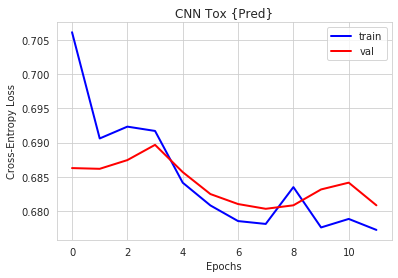

In [294]:
y_pred = model.predict(test_sequences_matrix)
model.save('cnn_embeddings_model.h5')

#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN Tox {Pred}')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [295]:
def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(29,100,input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy', precision, recall, fmeasure])

Model: "model_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 100)               0         
_________________________________________________________________
embedding_99 (Embedding)     (None, 100, 100)          2900      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [296]:
history = model.fit(sequences_matrix,Y_train, validation_split=0.2, epochs=50, batch_size=batch_size, verbose=1) #, callbacks=[EarlyStopping(monitor='val_acc',min_delta=0.0001)])

Train on 753 samples, validate on 189 samples
Epoch 1/50
753/753 [==============================] - 7s 9ms/step - loss: 0.6896 - acc: 0.5684 - precision: 0.5808 - recall: 0.8779 - fmeasure: 0.6894 - val_loss: 0.6913 - val_acc: 0.5344 - val_precision: 0.5344 - val_recall: 1.0000 - val_fmeasure: 0.6966
Epoch 2/50
753/753 [==============================] - 0s 594us/step - loss: 0.6853 - acc: 0.5618 - precision: 0.5618 - recall: 1.0000 - fmeasure: 0.7190 - val_loss: 0.6907 - val_acc: 0.5344 - val_precision: 0.5344 - val_recall: 1.0000 - val_fmeasure: 0.6966
Epoch 3/50
753/753 [==============================] - 0s 624us/step - loss: 0.6829 - acc: 0.5618 - precision: 0.5618 - recall: 1.0000 - fmeasure: 0.7190 - val_loss: 0.6968 - val_acc: 0.5344 - val_precision: 0.5344 - val_recall: 1.0000 - val_fmeasure: 0.6966
Epoch 4/50
753/753 [==============================] - 1s 668us/step - loss: 0.6820 - acc: 0.5618 - precision: 0.5618 - recall: 1.0000 - fmeasure: 0.7183 - val_loss: 0.6911 - val_acc:

753/753 [==============================] - 0s 609us/step - loss: 0.6575 - acc: 0.6109 - precision: 0.6647 - recall: 0.6934 - fmeasure: 0.6610 - val_loss: 0.6744 - val_acc: 0.5767 - val_precision: 0.5778 - val_recall: 0.7723 - val_fmeasure: 0.6610
Epoch 33/50
753/753 [==============================] - 0s 632us/step - loss: 0.6526 - acc: 0.6295 - precision: 0.6461 - recall: 0.8197 - fmeasure: 0.7124 - val_loss: 0.6732 - val_acc: 0.5714 - val_precision: 0.5926 - val_recall: 0.6337 - val_fmeasure: 0.6124
Epoch 34/50
753/753 [==============================] - 0s 634us/step - loss: 0.6443 - acc: 0.6560 - precision: 0.6758 - recall: 0.7455 - fmeasure: 0.7074 - val_loss: 0.6752 - val_acc: 0.5714 - val_precision: 0.5806 - val_recall: 0.7129 - val_fmeasure: 0.6400
Epoch 35/50
753/753 [==============================] - 0s 581us/step - loss: 0.6503 - acc: 0.6295 - precision: 0.6722 - recall: 0.6998 - fmeasure: 0.6751 - val_loss: 0.6817 - val_acc: 0.5503 - val_precision: 0.5494 - val_recall: 0.8812

In [297]:
test_sequences = tok.texts_to_sequences(X_testdf['Smiles']) # keep as dataframe format
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=maxlen)
accr = model.evaluate(test_sequences_matrix,Y_test)
test_prediction_scores = model.predict(test_sequences_matrix)
print('Val set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1], accr[2], accr[3]))
print('womp womp -- actually not so terriblez!')


import sklearn.metrics as sklm


# # for tox!
# def print_metrics_binary(y_true, predictions, verbose=1):
#     predictions = np.array(predictions)
#     if len(predictions.shape) == 1:
#         predictions = np.stack([1 - predictions, predictions]).transpose((1, 0))

#     cf = metrics.confusion_matrix(y_true, predictions.argmax(axis=1))
#     if verbose:
#         print("confusion matrix:")
#         print(cf)
#     cf = cf.astype(np.float32)

#     acc = (cf[0][0] + cf[1][1]) / np.sum(cf)
#     prec0 = cf[0][0] / (cf[0][0] + cf[1][0])
#     prec1 = cf[1][1] / (cf[1][1] + cf[0][1])
#     rec0 = cf[0][0] / (cf[0][0] + cf[0][1])
#     rec1 = cf[1][1] / (cf[1][1] + cf[1][0])
#     auroc = metrics.roc_auc_score(y_true, predictions[:, 1])

#     (precisions, recalls, thresholds) = metrics.precision_recall_curve(y_true, predictions[:, 1])
#     auprc = metrics.auc(recalls, precisions)
#     minpse = np.max([min(x, y) for (x, y) in zip(precisions, recalls)])

#     if verbose:
#         print("accuracy = {}".format(acc))
#         print("precision class 0 = {}".format(prec0))
#         print("precision class 1 = {}".format(prec1))
#         print("recall class 0 = {}".format(rec0))
#         print("recall class 1 = {}".format(rec1))
#         print("AUC of ROC = {}".format(auroc))
#         print("AUC of PRC = {}".format(auprc))
#         print("min(+P, Se) = {}".format(minpse))

#     return {"acc": acc,
#             "prec0": prec0,
#             "prec1": prec1,
#             "rec0": rec0,
#             "rec1": rec1,
#             "auroc": auroc,
#             "auprc": auprc,
#             "minpse": minpse}


average_precision = sklm.average_precision_score(Y_test.values, test_prediction_scores)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

## lets take a look at the

236/236 [==============================] - 0s 434us/step
Val set
  Loss: 0.684
  Accuracy: 0.597
womp womp -- actually not so terriblez!
Average precision-recall score: 0.67


In [364]:
len(sequences_matrix[0])
X_train = {}
X_train['smiles'] = sequences_matrix
X_train

{'smiles': array([[ 0,  0,  0, ...,  1,  1,  6],
        [ 0,  0,  0, ...,  3, 19,  1],
        [ 0,  0,  0, ...,  6,  3,  1],
        ...,
        [ 0,  0,  0, ...,  1,  3,  4],
        [ 0,  0,  0, ...,  3,  1, 12],
        [ 0,  0,  0, ...,  1,  3,  1]], dtype=int32)}

In [365]:
X_test = {}
X_test['smiles'] = test_sequences_matrix
X_test

{'smiles': array([[ 0,  0,  0, ...,  1,  6, 12],
        [ 7,  1,  2, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1,  1,  6],
        ...,
        [ 0,  0,  0, ...,  1,  1,  6],
        [ 1,  5,  5, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1, 10,  1]], dtype=int32)}

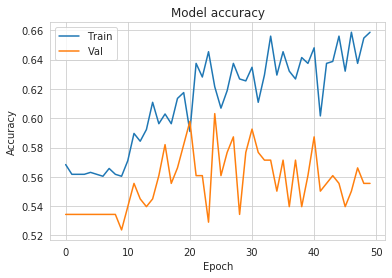

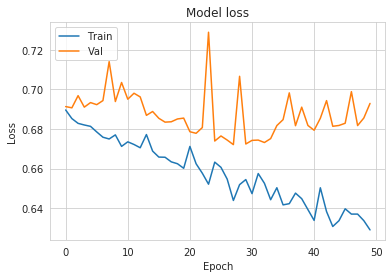

In [298]:
import matplotlib.pyplot as plt
# let's plot anyways
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

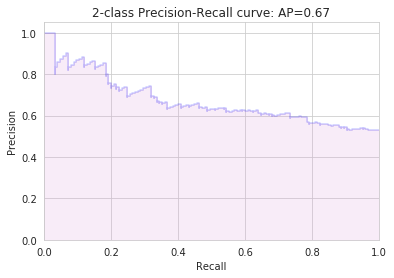

In [299]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test.values, test_prediction_scores)
import matplotlib.pyplot as plt
from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='plum', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Tox Liver Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5, 1.0, 'Tox Liver Precision-Recall curve: AP=0.67')

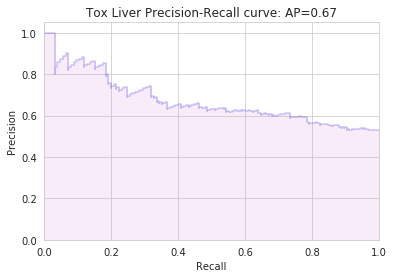

In [373]:
precision, recall, thresholds = sklm.precision_recall_curve(Y_test.values, test_prediction_scores)
import matplotlib.pyplot as plt
from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='plum', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Tox Liver Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [300]:
# saving keras model!
model.save('my_dweeby_model.h5')  # creates a HDF5 file 
del model  # deletes the existing model

In [303]:
len(X_train['smiles'][0])

100

In [366]:
X_test

{'smiles': array([[ 0,  0,  0, ...,  1,  6, 12],
        [ 7,  1,  2, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1,  1,  6],
        ...,
        [ 0,  0,  0, ...,  1,  1,  6],
        [ 1,  5,  5, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1, 10,  1]], dtype=int32)}

In [367]:
# smi tokenizer >
final_list_except_wo_SMILES = list(X_traindf.columns)
print(len(final_list_except_wo_SMILES))
final_list_except_wo_SMILES.remove('Smiles')
print(len(final_list_except_wo_SMILES))

X_train['num_vars'] = scaler.fit_transform(X_traindf[final_list_except_wo_SMILES])
X_test['num_vars'] = scaler.transform(X_testdf[final_list_except_wo_SMILES])

from keras.preprocessing.text import Tokenizer
print('mean text len:',X_traindf["Smiles"].str.count(regex).mean())
print('max text len:',X_traindf["Smiles"].str.count(regex).max())
min_count = 1
tokenizer = Tokenizer(char_level=True, num_words=29)
tokenizer.fit_on_texts(list(list_smiles_train) + list(list_smiles_test))
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])
print('num_words',num_words)
maxlen

1799
1798
mean text len: 26.20063694267516
max text len: 372
num_words 29


100

In [328]:
def smi_tokenizer(smi):
    """
    Tokenize a SMILES molecule or reaction
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens)
    return ' '.join(tokens)

# list_sentences_train = train["Smiles"].fillna("").values #.apply(lambda x: smi_tokenizer(x)).values
# print(list_sentences_train)#fillna("").values #(30053,)
# print(list_sentences_train.shape) # print(list_sentences_train.shape) # 

In [329]:
# y = Y_train.values
# max_features = 29 #
# maxlen = 100 #padding length
# num_folds = 3#2 #number of folds
# test = X_testdf
# train = X_traindf
# # TO DO --- fix SMILES emveddigsall
# list_sentences_test = test["Smiles"].fillna("").values#.apply(lambda x: smi_tokenizer(x)).values
# from keras.preprocessing.text import Tokenizer
# print('mean text len:',train["Smiles"].str.count('\S+').mean())
# print('max text len:',train["Smiles"].str.count('\S+').max())
# min_count =2
# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(list(list_sentences_train) + list(list_sentences_test))
# num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])
# print('num_words',num_words)
# tokenizer = Tokenizer(char_level=True)#, num_words=num_words)
# tokenizer.fit_on_texts(list(list_sentences_train)) # + list(list_sentences_test)
# list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# print('padding sequences')
# X_train = {}
# X_test = {}
# X_train['sentence'] = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen, padding='post', truncating='post')
# X_test['sentence'] = sequence.pad_sequences(list_tokenized_test, maxlen=maxlen, padding='post', truncating='post')

In [330]:
list_smiles_test[0]

'Brc1c(NC2=NCCN2)ccc2nccnc12'

In [368]:
len(test_sequences_matrix[:,0])

236

In [369]:
embed_size
len(X_test['smiles'][0])
X_test

{'smiles': array([[ 0,  0,  0, ...,  1,  6, 12],
        [ 7,  1,  2, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1,  1,  6],
        ...,
        [ 0,  0,  0, ...,  1,  1,  6],
        [ 1,  5,  5, ...,  4,  3,  1],
        [ 0,  0,  0, ...,  1, 10,  1]], dtype=int32),
 'num_vars': array([[0.04266347, 0.04125442, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.12883944, 1.08106115, 0.7       , ..., 0.05049383, 0.        ,
         0.00466838],
        [0.08117071, 0.08097098, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.0368367 , 0.03908137, 0.        , ..., 0.28635605, 0.        ,
         0.29306099],
        [0.14463684, 0.1294301 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03719085, 0.0462475 , 0.        , ..., 0.        , 0.        ,
         0.        ]])}

In [374]:
print(X_train["num_vars"].shape[1])


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
embeddings_index = {}

EMBEDDING_PATH = "/root/SMILESVecProteinRepresentation/source/utils/drug.chembl.canon.l1.ws20.txt"
EMBEDDING_DIM = 100
# dimension and path

f = open(EMBEDDING_PATH)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        

MAX_SEQUENCE_LENGTH = 1798
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
print(embedding_matrix.size)
[X_train["num_vars"].shape[1]]

1798
Found 29 unique tokens.
Found 60 word vectors.
3000


[1798]

In [375]:
max_features = 30
maxlen = 100

from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

opt = adam(lr=0.01, decay=1e-6)

def get_model_cnn(X_train):
    
    global embed_size
    inp = Input(shape=(maxlen, ), name="smiles")
    num_vars = Input(shape=[X_train["num_vars"].shape[1]], name="num_vars")
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    z = GlobalMaxPool1D()(x)
    x = GlobalMaxPool1D()(Conv1D(embed_size, 4, activation="relu")(x))
    x = Concatenate()([x,z,num_vars])
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=[inp,num_vars], outputs=x)
    model.compile(loss=binary_crossentropy, optimizer=opt, metrics=['accuracy', precision, recall, fmeasure])
    
    return model   

model = get_model_cnn(X_train)
model.summary()


/root/anaconda3/envs/ToxEnv/lib/python3.6/site-packages/keras/engine/training.py:378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if metric in ('accuracy', 'acc', 'crossentropy', 'ce'):


ValueError: ('Could not interpret metric function identifier:', array([0.53191489, 0.52991453, 0.53218884, 0.53017241, 0.53246753,
       0.53043478, 0.52838428, 0.53070175, 0.53303965, 0.53539823,
       0.53333333, 0.53571429, 0.53811659, 0.53603604, 0.53846154,
       0.53636364, 0.53424658, 0.53669725, 0.53456221, 0.53240741,
       0.53023256, 0.53271028, 0.53051643, 0.53301887, 0.53554502,
       0.53809524, 0.54066986, 0.54326923, 0.5410628 , 0.54368932,
       0.54146341, 0.54411765, 0.54679803, 0.54455446, 0.54726368,
       0.55      , 0.55276382, 0.55555556, 0.55329949, 0.55102041,
       0.54871795, 0.55154639, 0.55440415, 0.55208333, 0.55497382,
       0.55789474, 0.56084656, 0.55851064, 0.56149733, 0.55913978,
       0.55675676, 0.55978261, 0.56284153, 0.56593407, 0.56353591,
       0.56666667, 0.56424581, 0.56179775, 0.55932203, 0.5625    ,
       0.56571429, 0.56896552, 0.56647399, 0.56976744, 0.57309942,
       0.57647059, 0.57988166, 0.58333333, 0.58682635, 0.59036145,
       0.59393939, 0.59146341, 0.59509202, 0.59259259, 0.59627329,
       0.59375   , 0.59119497, 0.59493671, 0.59235669, 0.58974359,
       0.59354839, 0.5974026 , 0.60130719, 0.60526316, 0.60927152,
       0.61333333, 0.61073826, 0.60810811, 0.60544218, 0.60273973,
       0.6       , 0.59722222, 0.6013986 , 0.59859155, 0.60283688,
       0.60714286, 0.60431655, 0.60869565, 0.60583942, 0.61029412,
       0.60740741, 0.60447761, 0.60902256, 0.61363636, 0.61068702,
       0.61538462, 0.62015504, 0.625     , 0.62204724, 0.61904762,
       0.624     , 0.62096774, 0.62601626, 0.62295082, 0.61983471,
       0.625     , 0.62184874, 0.62711864, 0.62393162, 0.62068966,
       0.62608696, 0.62280702, 0.61946903, 0.61607143, 0.62162162,
       0.61818182, 0.62385321, 0.62962963, 0.63551402, 0.63207547,
       0.63809524, 0.63461538, 0.63106796, 0.62745098, 0.63366337,
       0.63      , 0.62626263, 0.62244898, 0.62886598, 0.63541667,
       0.64210526, 0.63829787, 0.6344086 , 0.64130435, 0.63736264,
       0.64444444, 0.65168539, 0.65909091, 0.65517241, 0.65116279,
       0.64705882, 0.64285714, 0.65060241, 0.64634146, 0.64197531,
       0.6375    , 0.64556962, 0.65384615, 0.64935065, 0.64473684,
       0.64      , 0.63513514, 0.63013699, 0.63888889, 0.64788732,
       0.65714286, 0.66666667, 0.66176471, 0.65671642, 0.66666667,
       0.66153846, 0.671875  , 0.66666667, 0.67741935, 0.68852459,
       0.68333333, 0.69491525, 0.68965517, 0.70175439, 0.71428571,
       0.72727273, 0.74074074, 0.73584906, 0.73076923, 0.7254902 ,
       0.72      , 0.71428571, 0.70833333, 0.70212766, 0.69565217,
       0.68888889, 0.70454545, 0.72093023, 0.73809524, 0.73170732,
       0.725     , 0.71794872, 0.73684211, 0.72972973, 0.75      ,
       0.74285714, 0.73529412, 0.75757576, 0.75      , 0.77419355,
       0.8       , 0.79310345, 0.82142857, 0.85185185, 0.84615385,
       0.84      , 0.83333333, 0.82608696, 0.86363636, 0.85714286,
       0.85      , 0.84210526, 0.83333333, 0.88235294, 0.875     ,
       0.86666667, 0.85714286, 0.84615385, 0.83333333, 0.81818182,
       0.9       , 0.88888889, 0.875     , 0.85714286, 0.83333333,
       0.8       , 1.        , 1.        , 1.        , 1.        ,
       1.        ]))

In [376]:
from keras import backend as K
from keras import metrics


def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))


def categorical_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1),
                          K.argmax(y_pred, axis=-1)))


def sparse_categorical_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.max(y_true, axis=-1),
                          K.cast(K.argmax(y_pred, axis=-1), K.floatx())))


def top_k_categorical_accuracy(y_true, y_pred, k=5):
    return K.mean(K.in_top_k(y_pred, K.argmax(y_true, axis=-1), k))


def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))


def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))


def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff)


def mean_squared_logarithmic_error(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.mean(K.square(first_log - second_log))


def hinge(y_true, y_pred):
    return K.mean(K.maximum(1. - y_true * y_pred, 0.))


def squared_hinge(y_true, y_pred):
    return K.mean(K.square(K.maximum(1. - y_true * y_pred, 0.)))


def categorical_crossentropy(y_true, y_pred):
    return K.mean(K.categorical_crossentropy(y_pred, y_true))


def sparse_categorical_crossentropy(y_true, y_pred):
    return K.mean(K.sparse_categorical_crossentropy(y_pred, y_true))


def binary_crossentropy(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_pred, y_true))


def kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.mean(K.sum(y_true * K.log(y_true / y_pred), axis=-1))


def poisson(y_true, y_pred):
    return K.mean(y_pred - y_true * K.log(y_pred + K.epsilon()))


def cosine_proximity(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis=-1)
    return -K.mean(y_true * y_pred)

def matthews_correlation(y_true, y_pred):
    """Matthews correlation metric.
    It is only computed as a batch-wise average, not globally.
    Computes the Matthews correlation coefficient measure for quality
    of binary classification problems.
    """
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())


def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)


# aliases
mse = MSE = mean_squared_error
mae = MAE = mean_absolute_error
mape = MAPE = mean_absolute_percentage_error
msle = MSLE = mean_squared_logarithmic_error
cosine = cosine_proximity
fscore = f1score = fmeasure
print("K backend imported!")


K backend imported!


In [311]:

Y_train[0:5]

328     0
358     1
43      0
1055    0
628     0
Name: label, dtype: int64

In [313]:
Y_trainf64 = Y_train.astype(np.float64)

In [312]:
Y_testf64 = Y_test.astype(np.float64).values
Y_testf64

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [342]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
Yl_train = le.fit_transform(Y_train)
# Yl_train
import sklearn.metrics as sklm
from keras.callbacks import Callback
# making class Metrics
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.confusion = []
        self.precision = []
        self.recall = []
        self.f1s = []
        self.kappa = []
        self.auc = []

    def on_epoch_end(self, epoch, logs={}):
        score = np.asarray(self.model.predict(self.validation_data[0]))
        predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
        targ = self.validation_data[1]

        self.auc.append(sklm.roc_auc_score(targ, score))
        self.confusion.append(sklm.confusion_matrix(targ, predict))
        self.precision.append(sklm.precision_score(targ, predict))
        auc = sklm.roc_auc_score(targ, score)
        prec = sklm.precision_score(targ, predict)
        self.recall.append(sklm.recall_score(targ, predict))
        rec = sklm.recall_score(targ, predict)
        self.f1s.append(sklm.f1_score(targ, predict, pos_label=1))
        f = sklm.f1_score(targ, predict, pos_label=1)
        self.kappa.append(sklm.cohen_kappa_score(targ, predict))

        print("\nepoch: %d == AUC: %.6f == Prec: %.6f == Rec: %.6f == F1: %.6f " %
              (epoch + 1, auc, prec, rec, f))

        return


kmetrics = Metrics()

In [377]:
X_train

{'smiles': array([[ 0,  0,  0, ...,  1,  1,  6],
        [ 0,  0,  0, ...,  3, 19,  1],
        [ 0,  0,  0, ...,  6,  3,  1],
        ...,
        [ 0,  0,  0, ...,  1,  3,  4],
        [ 0,  0,  0, ...,  3,  1, 12],
        [ 0,  0,  0, ...,  1,  3,  1]], dtype=int32),
 'num_vars': array([[0.08779506, 0.09206065, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.08338062, 0.08002749, 0.        , ..., 0.        , 0.        ,
         0.00108198],
        [0.01346517, 0.01304467, 0.        , ..., 0.06651872, 0.        ,
         0.        ],
        ...,
        [0.06694081, 0.06430076, 0.        , ..., 0.00844209, 0.        ,
         0.        ],
        [0.08300219, 0.07681889, 0.        , ..., 0.02531853, 0.        ,
         0.01988009],
        [0.09008543, 0.09121451, 0.        , ..., 0.        , 0.        ,
         0.        ]])}

In [345]:
embedding_matrix.size
X_test

def get_model_cnn(X_train):
    
    global embed_size
    inp = Input(shape=(len(word_index)+1, ), name="smiles")
    num_vars = Input(shape=[X_train["num_vars"].shape[1]], name="num_vars")
    x = Embedding(len(word_index)+1, 100, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    z = GlobalMaxPool1D()(x)
    x = GlobalMaxPool1D()(Conv1D(embed_size, 4, activation="relu")(x))
    x = Concatenate()([x,z,num_vars])
    x = Dropout(0.3)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=[inp,num_vars], outputs=x)
    model.compile(loss=binary_crossentropy, optimizer='adam', metrics=[precision, recall, fmeasure])
    
    return model   

model = get_model_cnn(X_train)
model.summary()

Model: "model_71"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
smiles (InputLayer)             (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_113 (Embedding)       (None, 30, 100)      3000        smiles[0][0]                     
__________________________________________________________________________________________________
spatial_dropout1d_68 (SpatialDr (None, 30, 100)      0           embedding_113[0][0]              
__________________________________________________________________________________________________
conv1d_90 (Conv1D)              (None, 27, 100)      40100       spatial_dropout1d_68[0][0]       
___________________________________________________________________________________________

In [378]:
X_train

{'smiles': array([[ 0,  0,  0, ...,  1,  1,  6],
        [ 0,  0,  0, ...,  3, 19,  1],
        [ 0,  0,  0, ...,  6,  3,  1],
        ...,
        [ 0,  0,  0, ...,  1,  3,  4],
        [ 0,  0,  0, ...,  3,  1, 12],
        [ 0,  0,  0, ...,  1,  3,  1]], dtype=int32),
 'num_vars': array([[0.08779506, 0.09206065, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.08338062, 0.08002749, 0.        , ..., 0.        , 0.        ,
         0.00108198],
        [0.01346517, 0.01304467, 0.        , ..., 0.06651872, 0.        ,
         0.        ],
        ...,
        [0.06694081, 0.06430076, 0.        , ..., 0.00844209, 0.        ,
         0.        ],
        [0.08300219, 0.07681889, 0.        , ..., 0.02531853, 0.        ,
         0.01988009],
        [0.09008543, 0.09121451, 0.        , ..., 0.        , 0.        ,
         0.        ]])}

In [401]:
from keras.callbacks import CSVLogger
# from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import datetime
print(today)
max_features = 30
maxlen = 100

reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5,
                              patience=50, min_lr=0.001)
csv_logger = CSVLogger('training_logs/' + str(today) + '_' + 'embedcharacter' + '_GRUPOOL.training.log',
                       append=False)

early = EarlyStopping(monitor='acc', min_delta=0.0001, patience=50)


sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("100 Dimension Embeddings Used: sliding window of 8 characters of SMILES \n")
print('start modeling')

from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

opt = adam(lr=0.01, decay=1e-6)

def get_model_cnn(X_train):
    
    global embed_dim
    inp = Input(shape=(maxlen, ), name="smiles")
    num_vars = Input(shape=[X_train["num_vars"].shape[1]], name="num_vars")
    x = Embedding(30, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    z = GlobalMaxPool1D()(x)
    x = GlobalMaxPool1D()(Conv1D(embed_dim, 10, activation="relu")(x))
    x = Concatenate()([x,z,num_vars])
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=[inp,num_vars], outputs=x)
    model.compile(loss=binary_crossentropy, optimizer=opt, metrics=['accuracy', precision, recall, fmeasure])
    return model   

model = get_model_cnn(X_train)
model.summary()

scores = []
predict = np.zeros((X_testdf.shape[0],1))
oof_predict = np.zeros((X_traindf.shape[0],1))

acc_scores = []
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=239)
for train_index, test_index in kf.split(X_train['num_vars']):
    kfold_X_train = {}
    kfold_X_valid = {}
    cvy_train,cvy_test = Yl_train[train_index], Yl_train[test_index]
    for c in ['smiles','num_vars']:
        kfold_X_train[c] = X_train[c][train_index]
        kfold_X_valid[c] = X_train[c][test_index]

 
    hist = model.fit(kfold_X_train, cvy_train, batch_size=256,epochs=120, callbacks=[early, reduce_lr, csv_logger], verbose=2)
    model.evaluate(kfold_X_train, cvy_train) #, batch_size=256, epochs=120, callbacks=[early, reduce_lr, csv_logger])
    predict += model.predict(X_test, batch_size=1000) / num_folds
    oof_predict[test_index] = model.predict(kfold_X_valid, batch_size=1000)
    
    cv_score = sklm.roc_auc_score(cvy_test, oof_predict[test_index])
   
    sklm.average_precision_score(cvy_test, oof_predict[test_index])
#     print(model.metrics_names)#, model.metrics_tensors)
    scores.append(cv_score)

    print('cv score: ', cv_score)

    

print('Total CV score is {}'.format(np.mean(scores)))    


2019-06-20
100 Dimension Embeddings Used: sliding window of 8 characters of SMILES 

start modeling
Model: "model_86"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
smiles (InputLayer)             (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_130 (Embedding)       (None, 100, 100)     3000        smiles[0][0]                     
__________________________________________________________________________________________________
spatial_dropout1d_83 (SpatialDr (None, 100, 100)     0           embedding_130[0][0]              
__________________________________________________________________________________________________
conv1d_105 (Conv1D)             (None, 91, 100)      100100      spatial_dropout1d_83[0][0

628/628 [==============================] - 4s 6ms/step
cv score:  0.5
Epoch 1/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7070
Epoch 2/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7076
Epoch 3/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7077
Epoch 4/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7074
Epoch 5/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7076
Epoch 6/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7070
Epoch 7/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7077
Epoch 8/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7067
Epoch 9/120
 - 0s - loss: 7.2891 - acc: 0.5478 - precision: 0.5478 - recall: 1.0000 - fmeasure: 0.7072
Epo

Epoch 28/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7308
Epoch 29/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7296
Epoch 30/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7302
Epoch 31/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7298
Epoch 32/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7312
Epoch 33/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7304
Epoch 34/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7312
Epoch 35/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7292
Epoch 36/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5764 - recall: 1.0000 - fmeasure: 0.7312
Epoch 37/120
 - 0s - loss: 6.8271 - acc: 0.5764 - precision: 0.5

In [402]:
#, #class_weight={0: 1, 1: 90})
# val_weights={0:1, 1:90}
import pprint
pprint.pprint(history.history.items())
# print(pd.DataFrame(kmetrics))
# print('confusion\n', kmetrics.confusion, 'precision\n', kmetrics.precision, 'recall\n',
# kmetrics.recall, 'f1\n', kmetrics.f1s, 'kappa\n', kmetrics.kappa, 'auc\n', kmetrics.auc)
# print("\nmodel predicting.. with batch size 1024 ( large batch size )")
predictions = model.predict(X_test, batch_size=1024)
# predictions


dict_items([('loss', [6.827091444829467, 6.827091347639728, 6.8270915329076685, 6.82709128993332, 6.82709142964357, 6.827091138074352, 6.82709114718589, 6.82709147823844, 6.8270912990448585, 6.827091235264092, 6.82709147823844, 6.827091493424336, 6.82709147823844, 6.827091624023049, 6.827091396234597, 6.82709124437563, 6.827091444829467, 6.82709142964357, 6.827091396234597, 6.82709147823844, 6.827091265635885, 6.827091590614076, 6.82709142964357, 6.8270912838589615, 6.827091639208946, 6.827091235264092, 6.827091444829467, 6.8270912838589615, 6.827091250449988, 6.827091201855119, 6.827091326379472, 6.827091332453831, 6.827091347639728, 6.827091435717929, 6.82709152683331, 6.827091611874331, 6.827091493424336, 6.827091721212788, 6.8270913810487, 6.827091396234597, 6.8270913810487, 6.827091235264092, 6.827091362825625, 6.827091396234597, 6.82709124437563, 6.827091311193575, 6.827091590614076, 6.827091542019207, 6.827091174520505, 6.827091198817939, 6.827091341565369]), ('acc', [0.57643311

KeyError: 'val_acc'

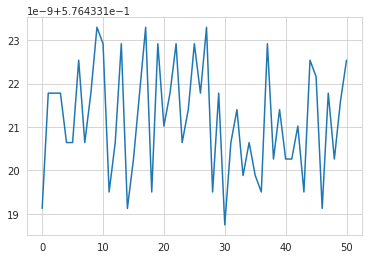

In [403]:
# predictions_binary = [round(value) for value in predictions]
# print("predictions binary\n", predictions_binary)
# print(type(predictions_binary))

# print("type predictions:", type(prediction_classes))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('pngs/gru_acc_' + str(today) + '_' + embed_name + '.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('pngs/gru_loss_' + str(today) + '_' + embed_name + '.png')


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

sns.set_style("whitegrid")
np.random.seed(0)


MAX_NB_WORDS = 100000
tokenizer = Tokenizer(char_level=True)
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('/root/SMILESVecProteinRepresentation/source/utils/drug.pubchem.canon.l8.ws20.txt', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

In [ ]:
train_df = pd.concat([X_traindf, Y_train], axis=1)
train_df

In [ ]:
train_df['doc_len'] = train_df['Smiles'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)
sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Smiles Length'); plt.legend()
plt.show()

In [ ]:
# ## THIRD MODEL


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
print("importing important packages!")
# from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import CSVLogger
# from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from keras import backend as K
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
# printing out date
print(today)



# making weighted binary cross entropy fxn
def weighted_binary_crossentropy(y_true, y_pred, weight=1.):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    logloss = -(y_true * K.log(y_pred) * weight + (1 - y_true) * K.log(1 - y_pred))
    return K.mean(logloss, axis=-1)


print("making environment!!")
embed_name = 'chembl8'  # 'WikiPubMedQNotes300DIM'
print("using the following pre-trained embeddings:", embed_name)
#.r/PycharmProjects/fastText-0.2.0/result/dim300WikiNotesLRpoint01.vec
EMBEDDING_FILE = '/root/SMILESVecProteinRepresentation/source/utils/drug.l8.chembl23.canon.ws20.txt'#'~/PycharmProjects/fastText-0.2.0/result/' + embed_name + '.vec'

In [ ]:
train = X_traindf
print("submission df and training and test made!")

X_train = train["Smiles"].fillna("fill na").values
print('type train["text"].fillna("fill na").values', type(X_train))
# print("type(train[['text','label']].values)", type(train[['text','label']].values))
y_train = Y_train
print("train['label'] type", type(X_train.shape))
test = X_testdf
X_test = test["Smiles"].fillna("fill na").values
y_test = Y_test
print("made X_train and y_train and X_test and y_test")
max_features = 29  # thinking about max features -- may change this
maxlen =   100 # using max length as 2500
embed_size = 100
print("tokenizing text...")
tokenizer = text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print("making embedding matrix...")

In [ ]:
def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')


embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

print("length of imbedding matrix:", len(embedding_matrix))
from keras.callbacks import Callback
import sklearn.metrics as sklm

In [ ]:
# making class Metrics
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.confusion = []|
        self.precision = []
        self.recall = []
        self.f1s = []
        self.kappa = []
        self.auc = []

    def on_epoch_end(self, epoch, logs={}):
        score = np.asarray(self.model.predict(self.validation_data[0]))
        predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
        targ = self.validation_data[1]

        self.auc.append(sklm.roc_auc_score(targ, score))
        self.confusion.append(sklm.confusion_matrix(targ, predict))
        self.precision.append(sklm.precision_score(targ, predict))
        auc = sklm.roc_auc_score(targ, score)
        prec = sklm.precision_score(targ, predict)
        self.recall.append(sklm.recall_score(targ, predict))
        rec = sklm.recall_score(targ, predict)
        self.f1s.append(sklm.f1_score(targ, predict, pos_label=1))
        f = sklm.f1_score(targ, predict, pos_label=1)
        self.kappa.append(sklm.cohen_kappa_score(targ, predict))

        print("\nepoch: %d == AUC: %.6f == Prec: %.6f == Rec: %.6f == F1: %.6f " %
              (epoch + 1, auc, prec, rec, f))

        return


kmetrics = Metrics()
embed_name = "pubcheml1"
csv_logger = CSVLogger('training_logs/' + str(today) + '_' + embed_name + '_GRUPOOL.training.log',
                       append=False)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)


def get_model():
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(80, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss=weighted_binary_crossentropy,
                  optimizer='adam',
                  metrics=['acc', precision, recall, fmeasure])

    return model


model = get_model()
print(model.summary())

In [ ]:
batch_size = 32  # trying 128 again because may be large enough to have class weight
epochs = 60
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=50, min_lr=0.001)

print("final shape of x_train:", x_train.shape)
print("final type of x_train:", type(x_train))
print("final shape of x_test:", x_test.shape)
print("final type of x_test:", type(x_test))
print("final type of y_train:", type(y_train))
print("\nfitting model..")


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
                    callbacks=[reduce_lr, csv_logger, early, kmetrics], verbose=2)#, #class_weight={0: 1, 1: 90})
# val_weights={0:1, 1:90}
print(history.history.keys())
print(pd.DataFrame(kmetrics))
print('confusion\n', kmetrics.confusion, 'precision\n', kmetrics.precision, 'recall\n',
kmetrics.recall, 'f1\n', kmetrics.f1s, 'kappa\n', kmetrics.kappa, 'auc\n', kmetrics.auc)
print("\nmodel predicting.. with batch size 1024 ( large batch size )")
predictions = model.predict(x_test, batch_size=1024)
print(predictions)
print(type(predictions))
predictions_binary = [round(value) for value in predictions]
print("predictions binary\n", predictions_binary)
print(type(predictions_binary))
prediction_classes = np.round(np.asarray(model.predict(x_test, batch_size=1024)))
print(prediction_classes)
print("type predictions:", type(prediction_classes))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('pngs/gru_acc_' + str(today) + '_' + embed_name + '.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('pngs/gru_loss_' + str(today) + '_' + embed_name + '.png')
print(sklm.classification_report(prediction_classes))
print("trying to reshape repdictions", predictions.reshape(-1, 1))
print("done!")

In [ ]:
# need to keep training

In [ ]:
# pick up epoch on instance

In [ ]:
import numpy as np
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.split(' '))
        for o in open('/root/SMILESVecProteinRepresentation/source/utils/drug.l8.chembl23.canon.ws20.txt'))

all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()

print('creating embedding matrix ...')
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector


In [ ]:
print('ha!')
